In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure settings for visualizations
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load datasets
customers = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Customers.csv")
products = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Products.csv")
transactions = pd.read_csv(r"C:\Users\pc\Desktop\zeotap\ecommerce_analysis\data\Transactions.csv")

# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [35]:
# Check record counts and missing values
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

# Summary of missing data
print("\nMissing Data Summary:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())



Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [36]:
# Analyze date ranges
print("\nSignup Date Range:")
print(customers['SignupDate'].min(), "to", customers['SignupDate'].max())

print("\nTransaction Date Range:")
print(transactions['TransactionDate'].min(), "to", transactions['TransactionDate'].max())



Signup Date Range:
2022-01-22 to 2024-12-28

Transaction Date Range:
2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [37]:
# Check for duplicate records
print("\nDuplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())



Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


In [38]:
# Describe numerical columns
print("\nCustomers Summary Stats:")
print(customers.describe(include='all'))
print("\nProducts Summary Stats:")
print(products.describe(include='all'))
print("\nTransactions Summary Stats:")
print(transactions.describe())



Customers Summary Stats:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

Products Summary Stats:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN        

C:\Users\pc\AppData\Local\Temp\ipykernel_20928\3934120068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


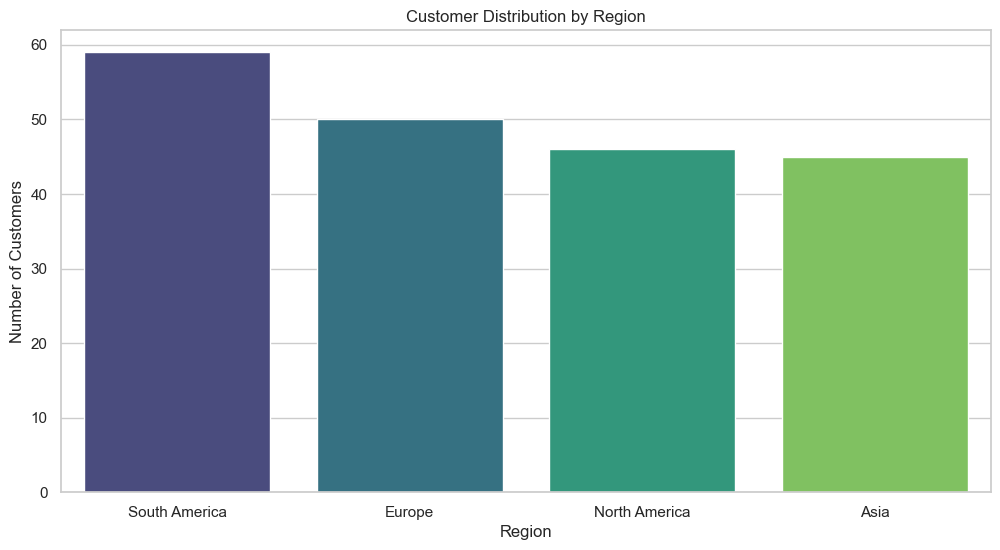

In [39]:
# Plot customer distribution by region
region_distribution = customers['Region'].value_counts()
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


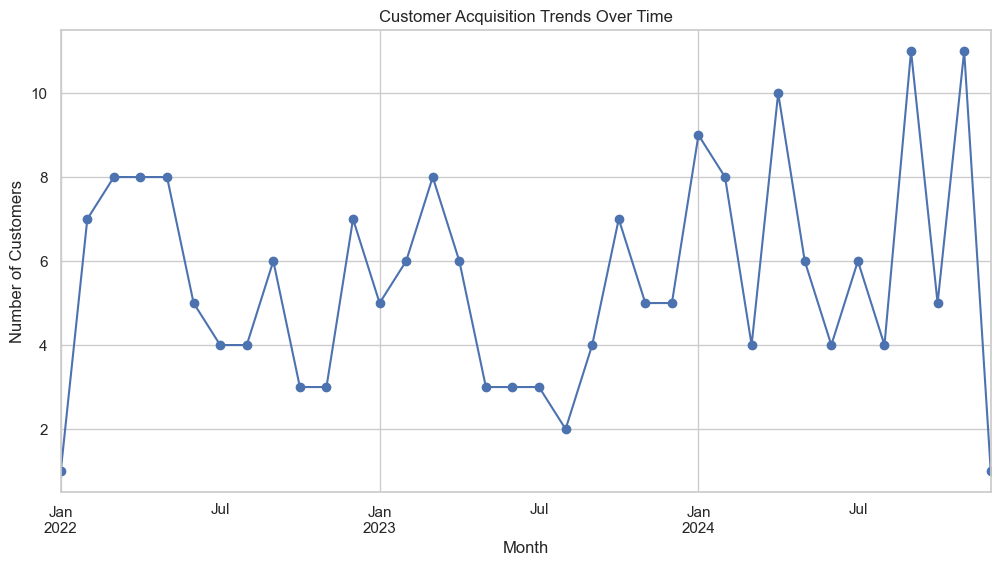

In [40]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Group by month and count
customer_acquisition = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
customer_acquisition.plot(kind='line', title='Customer Acquisition Trends Over Time', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_20928\743902654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cohort_distribution.index, y=cohort_distribution.values, palette='coolwarm')


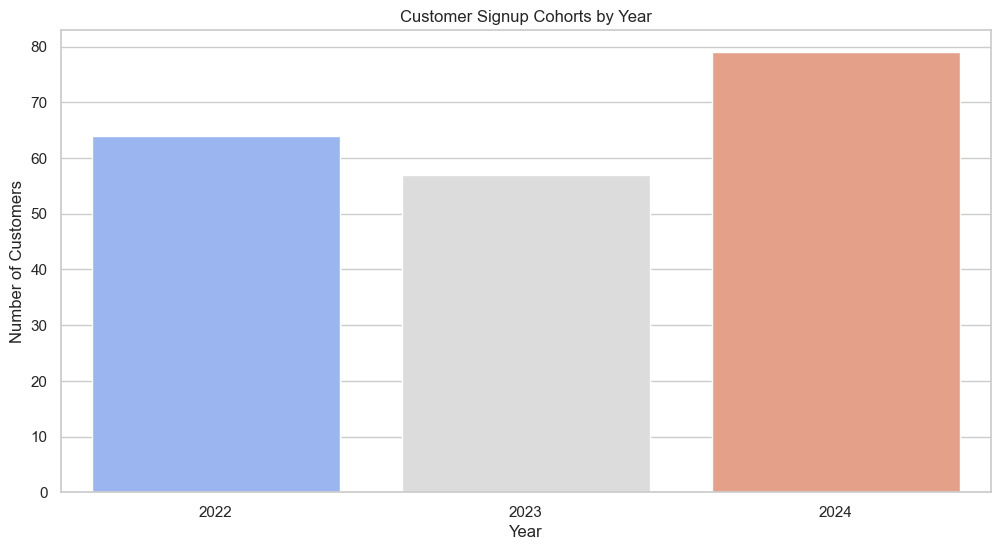

In [41]:
# Create signup cohorts based on year
customers['SignupYear'] = customers['SignupDate'].dt.year
cohort_distribution = customers['SignupYear'].value_counts().sort_index()

sns.barplot(x=cohort_distribution.index, y=cohort_distribution.values, palette='coolwarm')
plt.title('Customer Signup Cohorts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_20928\71513479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='Set2')


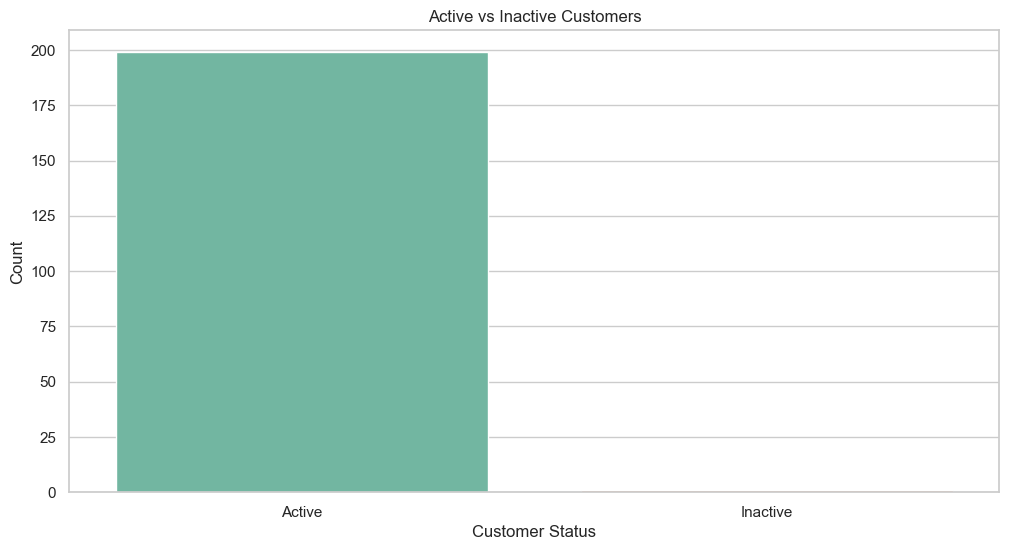

In [42]:
# Join transactions to identify active customers
active_customers = transactions['CustomerID'].unique()
customers['IsActive'] = customers['CustomerID'].apply(lambda x: 'Active' if x in active_customers else 'Inactive')

active_distribution = customers['IsActive'].value_counts()
sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='Set2')
plt.title('Active vs Inactive Customers')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()


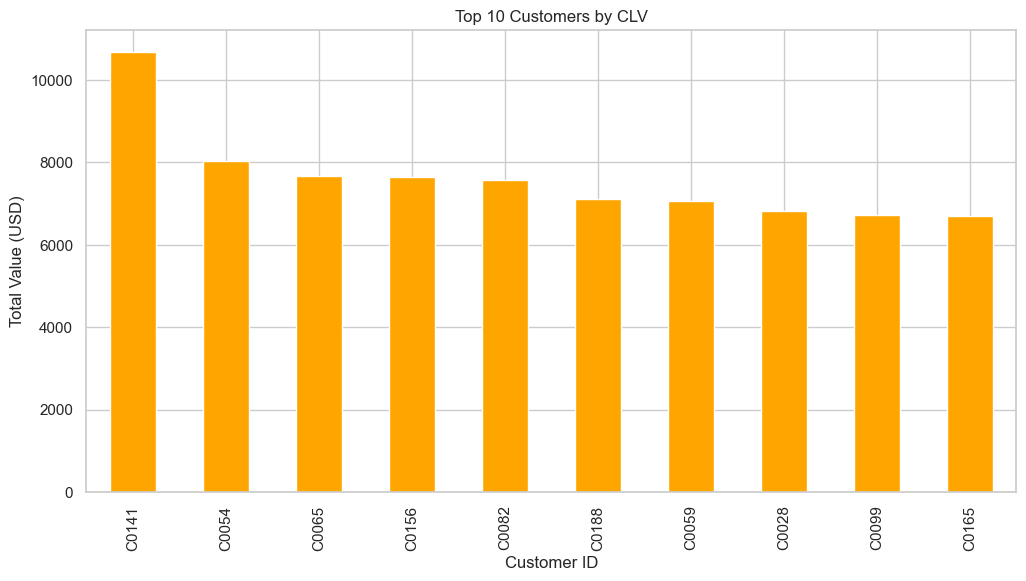

In [43]:
# Calculate CLV for each customer
clv = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Plot top 10 CLV customers
clv.head(10).plot(kind='bar', title='Top 10 Customers by CLV', color='orange')
plt.xlabel('Customer ID')
plt.ylabel('Total Value (USD)')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_20928\3628744655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='cubehelix')


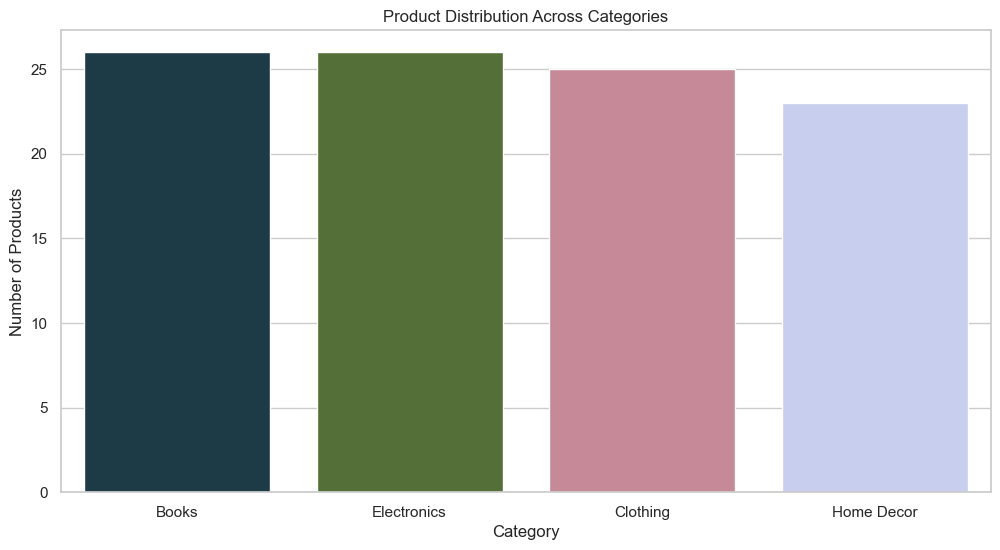

In [44]:
# Plot product distribution by category
category_distribution = products['Category'].value_counts()
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='cubehelix')
plt.title('Product Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


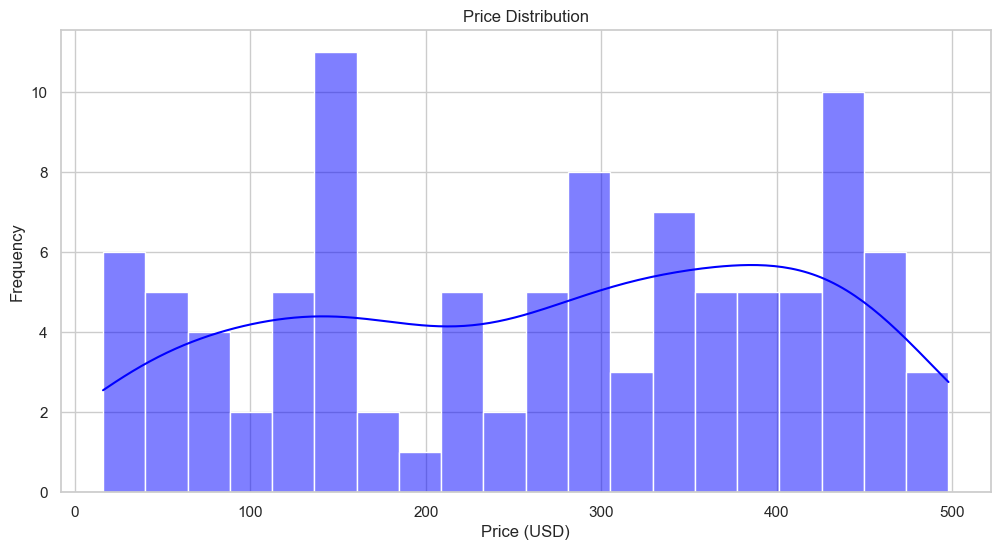

In [45]:
# Plot price distribution
sns.histplot(products['Price'], kde=True, bins=20, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


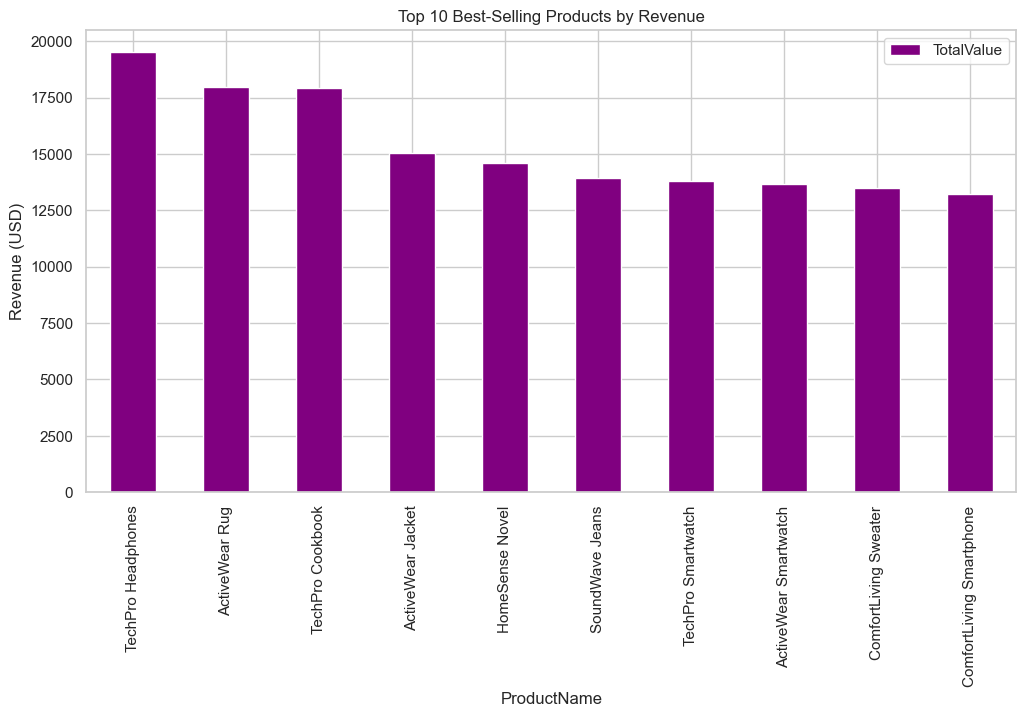

In [46]:
# Identify best-selling products by quantity and revenue
top_products = transactions.groupby('ProductID').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False)
top_products = top_products.merge(products, on='ProductID')

# Plot top 10 products by revenue
top_products.head(10).plot(kind='bar', y='TotalValue', x='ProductName', title='Top 10 Best-Selling Products by Revenue', color='purple')
plt.ylabel('Revenue (USD)')
plt.show()


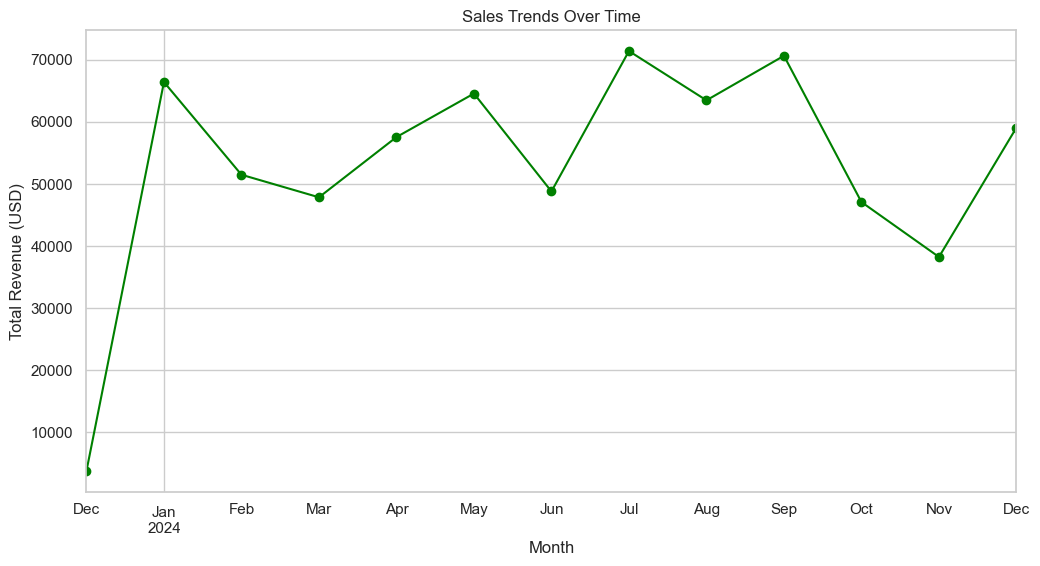

In [47]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate sales by month
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.plot(kind='line', title='Sales Trends Over Time', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.show()


In [48]:
# Calculate average order value
aov = transactions['TotalValue'].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")


Average Order Value (AOV): $690.00


C:\Users\pc\AppData\Local\Temp\ipykernel_20928\1807070005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='cool')


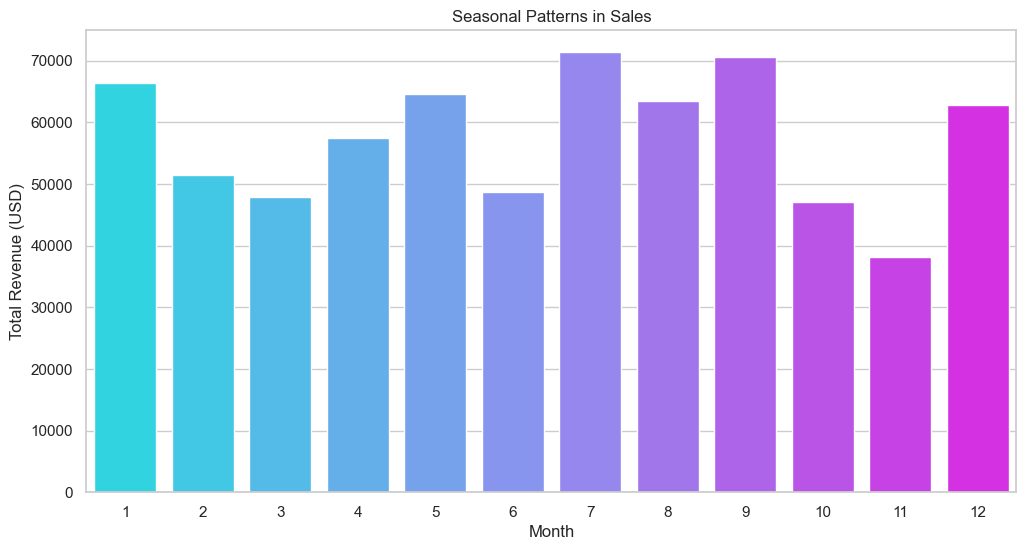

In [49]:
# Group by month to identify seasonal patterns
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='cool')
plt.title('Seasonal Patterns in Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.show()


In [50]:
# Insight Extraction: Customers
print("Customer Insights:")
print(f"- Total Customers: {customers['CustomerID'].nunique()}")
print(f"- Region Distribution:\n{customers['Region'].value_counts()}")
print(f"- Active Customers: {customers[customers['IsActive'] == 'Active'].shape[0]} / {customers.shape[0]} ({customers[customers['IsActive'] == 'Active'].shape[0] / customers.shape[0] * 100:.2f}%)")
print(f"- Yearly Signup Trends:\n{customers['SignupYear'].value_counts().sort_index()}")

# Insight Extraction: Products
print("\nProduct Insights:")
print(f"- Total Products: {products['ProductID'].nunique()}")
print(f"- Product Categories:\n{products['Category'].value_counts()}")
print(f"- Price Range: ${products['Price'].min():.2f} - ${products['Price'].max():.2f}")
print(f"- Top-Selling Product by Revenue:\n{top_products.iloc[0]}")

# Insight Extraction: Transactions
print("\nTransaction Insights:")
print(f"- Total Transactions: {transactions['TransactionID'].nunique()}")
print(f"- Total Revenue: ${transactions['TotalValue'].sum():,.2f}")
print(f"- Date Range: {transactions['TransactionDate'].min().date()} to {transactions['TransactionDate'].max().date()}")
print(f"- Average Order Value (AOV): ${transactions['TotalValue'].mean():.2f}")
print(f"- Monthly Sales:\n{monthly_sales.sort_index()}")
print(f"- Seasonal Peak Month: {monthly_sales.idxmax()} with Revenue of ${monthly_sales.max():,.2f}")

# Cross-Analysis: Customers and Transactions
print("\nCross-Analysis Insights:")
region_sales = transactions.merge(customers, on="CustomerID").groupby("Region")["TotalValue"].sum()
print(f"- Sales by Region:\n{region_sales}")
product_region = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID").groupby(["Region", "Category"])["TotalValue"].sum()
print(f"- Product Category Popularity by Region:\n{product_region}")

# Customer Lifetime Value
top_clv = clv.head(5)
print(f"- Top 5 Customers by Lifetime Value (CLV):\n{top_clv}")


Customer Insights:
- Total Customers: 200
- Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
- Active Customers: 199 / 200 (99.50%)
- Yearly Signup Trends:
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64

Product Insights:
- Total Products: 100
- Product Categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
- Price Range: $16.08 - $497.76
- Top-Selling Product by Revenue:
ProductID                    P029
Quantity                       45
TotalValue                19513.8
ProductName    TechPro Headphones
Category              Electronics
Price                      433.64
Name: 0, dtype: object

Transaction Insights:
- Total Transactions: 1000
- Total Revenue: $689,995.56
- Date Range: 2023-12-30 to 2024-12-28
- Average Order Value (AOV): $690.00
- Monthly Sales:
Month
1     66376.39
2     51459.27
3     47828.73
4  

In [51]:
# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract Year, Month, and Day from the TransactionDate
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Day'] = transactions['TransactionDate'].dt.date


In [55]:
import pandas as pd

# Assuming `transactions` DataFrame already exists
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract month and day
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')  # Year-Month
transactions['Day'] = transactions['TransactionDate'].dt.date  # Exact Date (Day)

# Group by Year-Month to get monthly order counts
monthly_orders = transactions.groupby('YearMonth').size().reset_index(name='OrderCount')
print("Monthly Order Counts:")
print(monthly_orders)

# Group by Day to get daily order counts
daily_orders = transactions.groupby('Day').size().reset_index(name='OrderCount')
print("\nDaily Order Counts:")
print(daily_orders)


Monthly Order Counts:
   YearMonth  OrderCount
0    2023-12           4
1    2024-01         107
2    2024-02          77
3    2024-03          80
4    2024-04          86
5    2024-05          86
6    2024-06          69
7    2024-07          96
8    2024-08          94
9    2024-09          96
10   2024-10          70
11   2024-11          57
12   2024-12          78

Daily Order Counts:
            Day  OrderCount
0    2023-12-30           1
1    2023-12-31           3
2    2024-01-01           4
3    2024-01-02           4
4    2024-01-03           4
..          ...         ...
332  2024-12-24           3
333  2024-12-25           4
334  2024-12-26           6
335  2024-12-27           2
336  2024-12-28           1

[337 rows x 2 columns]


C:\Users\pc\AppData\Local\Temp\ipykernel_20928\1882441202.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(orders_per_month['Year'].unique()))  # Get a colormap


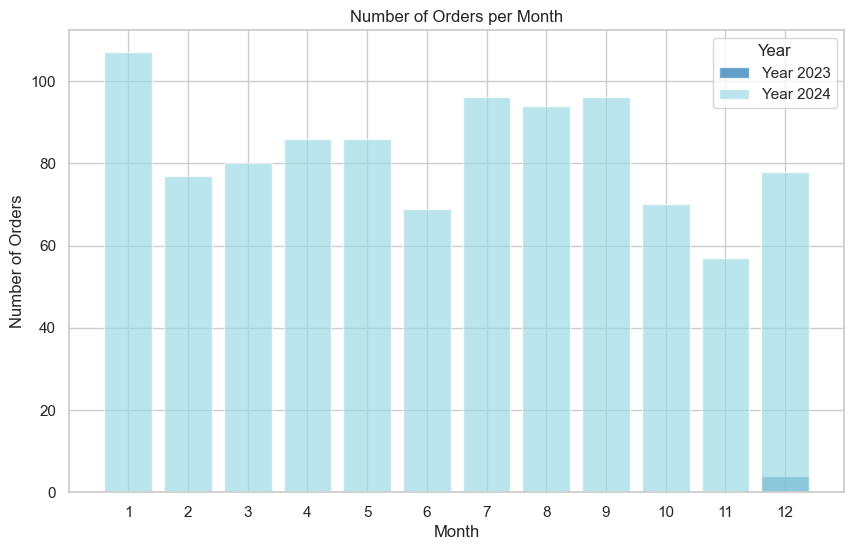

In [52]:
# 1. Number of Orders per Month
orders_per_month = transactions.groupby(['Year', 'Month'])['TransactionID'].count().reset_index()
orders_per_month.columns = ['Year', 'Month', 'Num_Orders']

# Plotting Orders per Month 
plt.figure(figsize=(10,6))
colors = plt.cm.get_cmap('tab20', len(orders_per_month['Year'].unique()))  # Get a colormap
for idx, year in enumerate(orders_per_month['Year'].unique()):
    month_data = orders_per_month[orders_per_month['Year'] == year]
    plt.bar(month_data['Month'], month_data['Num_Orders'], 
            label=f'Year {year}', color=colors(idx), alpha=0.7)

plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.legend(title='Year')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_20928\2771606232.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(orders_per_day))


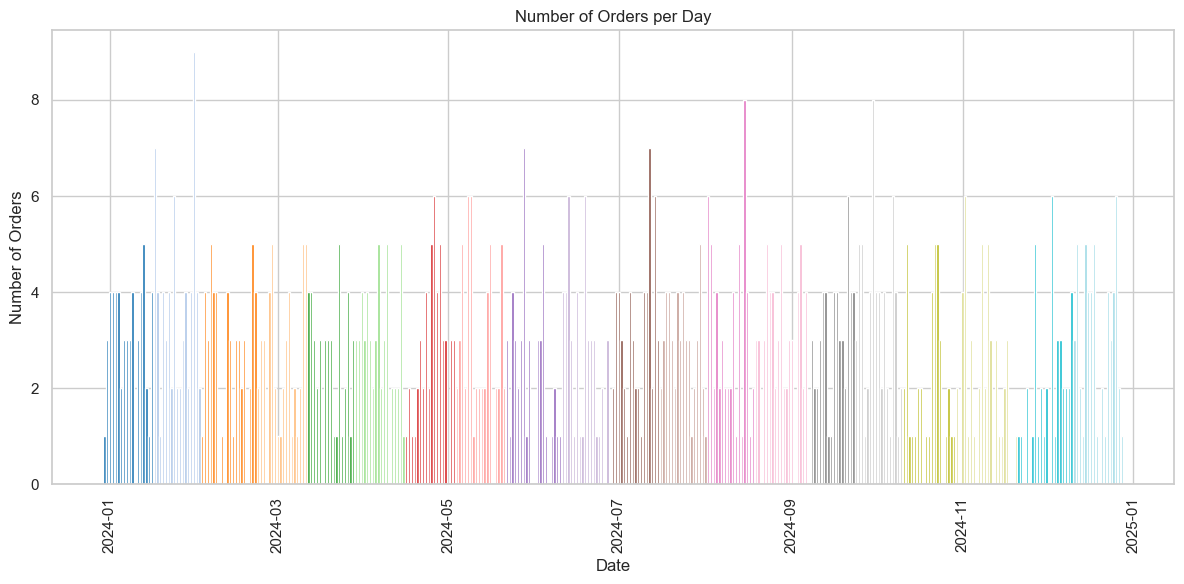

In [57]:
# 2. Number of Orders per Day
orders_per_day = transactions.groupby('Day')['TransactionID'].count().reset_index()
orders_per_day.columns = ['Date', 'Num_Orders']

# Plotting Orders per Day (Bar chart with different colors for each bar)
plt.figure(figsize=(12,6))
colors = plt.cm.get_cmap('tab20', len(orders_per_day))  
plt.bar(orders_per_day['Date'], orders_per_day['Num_Orders'], 
        color=colors(range(len(orders_per_day))))
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [58]:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extracting Year, Month, and Day
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions['Month'] = transactions['TransactionDate'].dt.month_name()
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()

# Monthly order analysis
monthly_orders = transactions.groupby('Month').size().reset_index(name='OrderCount').sort_values(by='OrderCount', ascending=False)
print("Monthly Order Insights:")
print(monthly_orders)

# Daily order analysis
day_orders = transactions.groupby('DayOfWeek').size().reset_index(name='OrderCount').sort_values(by='OrderCount', ascending=False)
print("\nDay of the Week Order Insights:")
print(day_orders)

# Identifying peak month and least active month
peak_month = monthly_orders.iloc[0]
least_active_month = monthly_orders.iloc[-1]

# Identifying busiest and least busy day of the week
busiest_day = day_orders.iloc[0]
least_busy_day = day_orders.iloc[-1]

print(f"\nPeak Month: {peak_month['Month']} with {peak_month['OrderCount']} orders.")
print(f"Least Active Month: {least_active_month['Month']} with {least_active_month['OrderCount']} orders.")
print(f"Busiest Day of the Week: {busiest_day['DayOfWeek']} with {busiest_day['OrderCount']} orders.")
print(f"Least Busy Day of the Week: {least_busy_day['DayOfWeek']} with {least_busy_day['OrderCount']} orders.")


Monthly Order Insights:
        Month  OrderCount
4     January         107
5        July          96
11  September          96
1      August          94
0       April          86
8         May          86
2    December          82
7       March          80
3    February          77
10    October          70
6        June          69
9    November          57

Day of the Week Order Insights:
   DayOfWeek  OrderCount
5    Tuesday         163
6  Wednesday         158
4   Thursday         150
1     Monday         139
3     Sunday         139
2   Saturday         126
0     Friday         125

Peak Month: January with 107 orders.
Least Active Month: November with 57 orders.
Busiest Day of the Week: Tuesday with 163 orders.
Least Busy Day of the Week: Friday with 125 orders.
